### Data cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('Fitness_trackers_updated.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      610 non-null    object 
 1   Device Type                     610 non-null    object 
 2   Model Name                      610 non-null    object 
 3   Color                           610 non-null    object 
 4   Selling Price                   610 non-null    object 
 5   Original Price                  610 non-null    object 
 6   Display                         610 non-null    object 
 7   Rating (Out of 5)               554 non-null    float64
 8   Strap Material                  610 non-null    object 
 9   Average Battery Life (in days)  610 non-null    int64  
 10  Reviews                         114 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 52.5+ KB


In [53]:
df.drop(['Reviews'], axis = 1, inplace = True)

In [54]:
df.dtypes

Brand Name                         object
Device Type                        object
Model Name                         object
Color                              object
Selling Price                      object
Original Price                     object
Display                            object
Rating (Out of 5)                 float64
Strap Material                     object
Average Battery Life (in days)      int64
dtype: object

In [37]:
df.shape

(610, 10)

In [155]:
df.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days)
0,Xiaomi,FitnessBand,Smart Band 5,Black,"2,499","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14
1,Xiaomi,FitnessBand,Smart Band 4,Black,"2,099","2,499",AMOLED Display,4.2,Thermoplastic polyurethane,14
2,Xiaomi,FitnessBand,HMSH01GE,Black,"1,722","2,099",LCD Display,3.5,Leather,14
3,Xiaomi,FitnessBand,Smart Band 5,Black,"2,469","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14
4,Xiaomi,FitnessBand,Band 3,Black,"1,799","2,199",OLED Display,4.3,Plastic,7


In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating (Out of 5),554.0,4.195668,0.422576,2.0,4.0,4.2,4.5,5.0
Average Battery Life (in days),610.0,8.926230,7.632107,1.0,2.0,7.0,14.0,45.0


### Fitness trackers' type market share

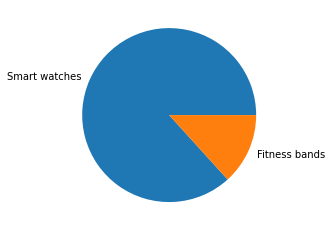

In [31]:
labels = 'Smart watches', 'Fitness bands'
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels)
plt.show()

### Brand with averaging rate scores

In [24]:
df['Brand Name'].nunique()

25

In [146]:
df_1 = df.groupby('Brand Name')['Rating (Out of 5)'].mean().sort_values(ascending = False)
round(df_1, 1)

Brand Name
APPLE              4.5
OnePlus            4.3
dizo by realme     4.2
FOSSIL             4.2
SAMSUNG            4.2
Honor              4.2
FitBit             4.2
Xiaomi             4.2
Huawei             4.2
huami              4.2
realme             4.1
GARMIN             4.1
Noise              4.1
Fastrack           4.0
Crossbeats         3.9
Oppo               3.9
boAt               3.9
Infinix            3.8
Noise              3.8
Fire-Boltt         3.7
Zebronics          3.7
LCARE              3.6
LAVA               3.6
GOQii              3.4
Ptron              3.2
Name: Rating (Out of 5), dtype: float64

<AxesSubplot:xlabel='Brand Name'>

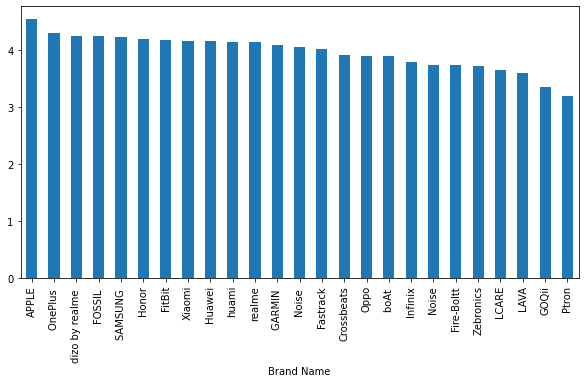

In [147]:
df_1.plot.bar(figsize = (10, 5))

###  	Device Type with average rating scores 

In [148]:
df_2 = df.groupby('Device Type')['Rating (Out of 5)'].mean()
round(df_2, 1)

Device Type
FitnessBand    4.1
Smartwatch     4.2
Name: Rating (Out of 5), dtype: float64

<AxesSubplot:xlabel='Device Type'>

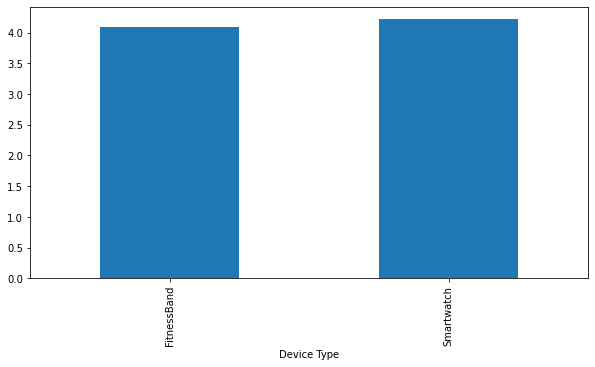

In [61]:
df_2.plot.bar(figsize = (10, 5))

###  	Display with averaging rating scores

In [149]:
df_3 = df.groupby('Display')['Rating (Out of 5)'].mean().sort_values(ascending = False)
round(df_3)

Display
OLED Retina Display    5.0
PMOLED Display         4.0
AMOLED Display         4.0
LED Display            4.0
OLED Display           4.0
HD Display             4.0
LCD Display            4.0
IPS Display            4.0
TFT-LCD Display        4.0
Name: Rating (Out of 5), dtype: float64

<AxesSubplot:xlabel='Display'>

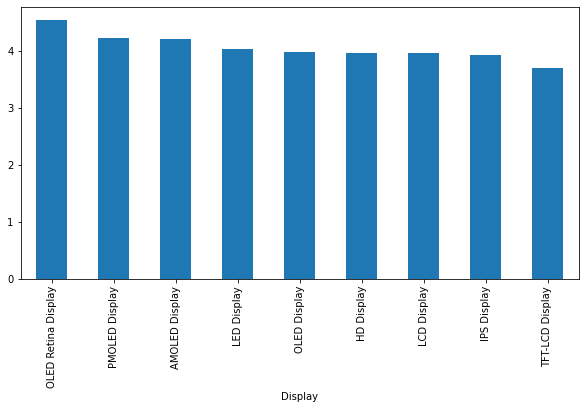

In [150]:
df_3.plot.bar(figsize = (10, 5))

### Selling Price - Brands

In [55]:
df["Selling Price"] = pd.to_numeric(df["Selling Price"].str.replace(',',''))
df["Original Price"] = pd.to_numeric(df["Original Price"].str.replace(',',''))

In [56]:
df.dtypes

Brand Name                         object
Device Type                        object
Model Name                         object
Color                              object
Selling Price                       int64
Original Price                      int64
Display                            object
Rating (Out of 5)                 float64
Strap Material                     object
Average Battery Life (in days)      int64
dtype: object

In [59]:
print(max(df['Selling Price']))
print(min(df['Original Price']))
print((max(df['Selling Price']) - min(df['Original Price']))/10)

122090
1599
12049.1


In [60]:
bins = [1500, 2800, 4100, 5400, 6700, 8000, 9300, 10600, 11900, 13200]

In [61]:
df['Selling Price Groups'] = pd.cut(df['Selling Price'], bins)

In [62]:
df.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Selling Price Groups
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,"(1500, 2800]"
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,"(1500, 2800]"
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,"(1500, 2800]"
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,"(1500, 2800]"
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,"(1500, 2800]"


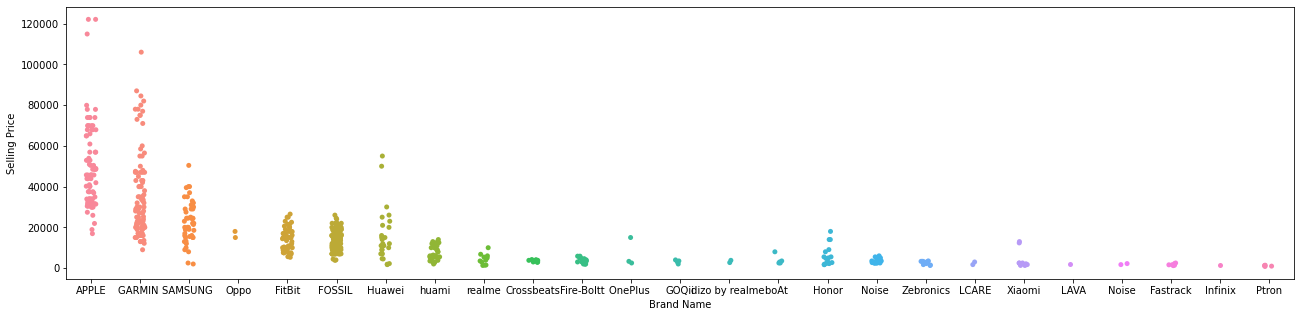

In [68]:
fig, ax = plt.subplots(figsize=(22, 5))
median_index = df[["Brand Name", "Selling Price"]].groupby("Brand Name").median().sort_values(by=["Selling Price"], ascending = False).index
ax = sns.stripplot(x="Brand Name", y="Selling Price", data=df, order = median_index)

### Strap Material with rating groups 

In [186]:
df['Strap Material'].nunique()

12

In [171]:
df_5 = df[['Strap Material', 'Rating groups']]

In [184]:
df_5 = df.groupby(['Rating groups', 'Strap Material'])['Strap Material'].count().sort_values(ascending = False)
round(df_5)

Rating groups  Strap Material            
(4, 5]         Silicone                      145
(3, 4]         Silicone                       77
(4, 5]         Stainless Steel                74
               Aluminium                      57
               Leather                        40
               Elastomer                      40
(3, 4]         Stainless Steel                20
(4, 5]         Thermoplastic polyurethane     18
(3, 4]         Thermoplastic polyurethane     17
               Leather                        14
(4, 5]         Plastic                        14
(3, 4]         Rubber                          9
(2, 3]         Silicone                        8
(4, 5]         Nylon                           5
(3, 4]         Elastomer                       5
(4, 5]         Rubber                          3
(2, 3]         Stainless Steel                 2
(3, 4]         Plastic                         2
               Nylon                           1
(1, 2]         Silicone    

<AxesSubplot:xlabel='Rating groups,Strap Material'>

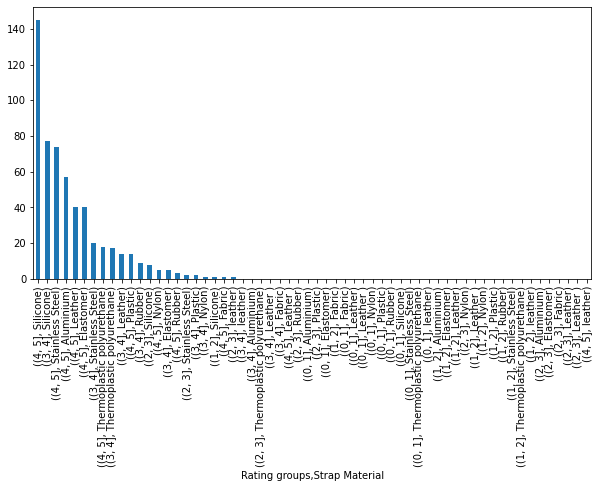

In [181]:
df_5.plot.bar(figsize = (10, 5))